# <span style="font-weight:bold">Exploratory Data Analyst example in the UK</span>

In [1]:
## Import the necessary libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## <span style="color:orange; font-weight:bold">Creating a barplot for Counts of Job Available in UK</span>
1. Filter the dataframe for UK
2. Obtain the job postings for each jobs
3. Plot the barplot

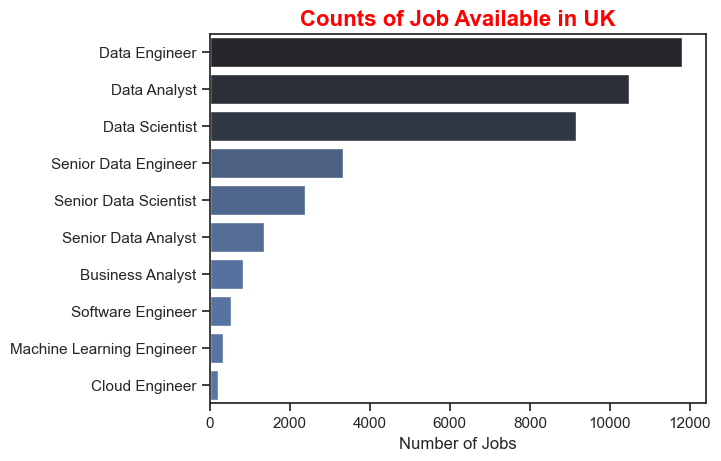

In [2]:
df_UK = df[df['job_country']=='United Kingdom'].copy()

df_UK_count = df_UK['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_UK_count, x='count', y = 'job_title_short', hue='count', palette='dark:b_r',legend=False)
plt.title('Counts of Job Available in UK', fontsize=16, fontweight='bold', color='red')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

## Key Observations:
### 1. Most In-Demand Roles:
- Data Engineer leads with the highest job count (~11,500).

- Data Analyst and Data Scientist follow, with slightly fewer but still very strong demand (~10,000 and ~9,000 respectively).

- These three roles significantly outpace all others, indicating core demand in data pipeline, analysis, and modeling roles.

### 2. Mid-Level Roles:
- Senior Data Engineer, Senior Data Scientist, and Senior Data Analyst appear in the middle range (between ~1,500–3,500).  

- These roles suggest a healthy career progression path in the UK job market, though not as abundant as entry- or mid-level positions.

### 3. Less Common but Specialized Roles:
- Business Analyst, Software Engineer, Machine Learning Engineer, and Cloud Engineer have noticeably fewer job listings.

- This may indicate:
A more saturated or specialized market.
Or that business-specific roles (like Business Analyst) are being absorbed under broader job titles.

### Implications for Job Seekers:
- If you're aiming to break into tech in the UK, Data Engineer and Data Analyst are the safest bets in terms of volume.

- For long-term growth, investing in senior-level or niche roles (like ML or Cloud) may provide higher value, albeit with stiffer competition.

---

## <span style="color:orange; font-weight:bold">Creating a Pie Plot for Data Analyst in UK</span>
1. Create a dictionary of (Work from Home, Degree Required, Health Insurance Offered) 
2. Using subplots method to create 3 pie chart for each with its True/False output
3. Making the labels into percentages(%)

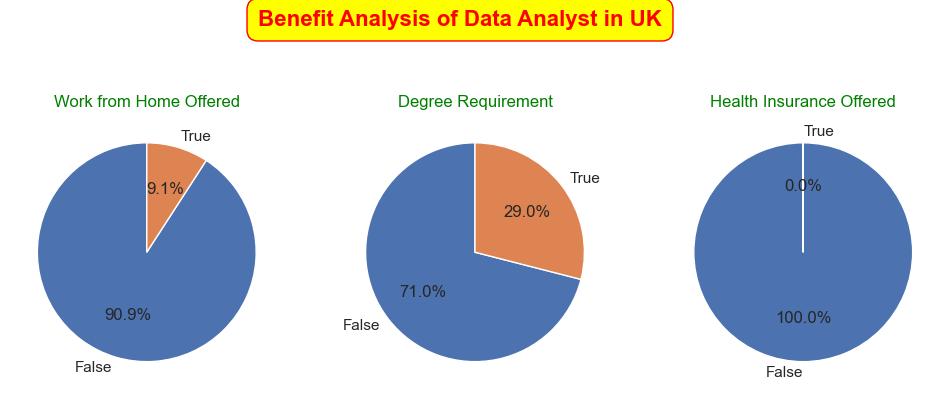

In [20]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst')&(df['job_country'] == 'United Kingdom')].copy()
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UK[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title, color='green')

plt.suptitle(
    'Benefit Analysis of Data Analyst in UK',
    fontsize=16,
    color='red',
    fontweight='bold',
    bbox=dict(facecolor='yellow', edgecolor='red', boxstyle='round, pad=0.5')
)
plt.show()

## Insights of these Pie Charts
###  Work from Home Offered  
False: 90.7% — Most data jobs do not offer remote work.

True: 9.3% — Only a small fraction explicitly offer remote options.

### Degree Requirement
False: 50.2% — Nearly half of the jobs do not require a degree.

True: 49.8% — The other half do require a degree.

- This suggests degree requirements are evenly split, showing flexibility in education expectations.

### Health Insurance Offered
False: 100.0% — None of the jobs mention offering health insurance.

True: 0.0% — This may reflect either:

- UK companies not listing it explicitly (due to NHS coverage)

- A limitation in how the data captures benefits.

---

## <span style="color:orange; font-weight:bold">Creating a barplot for Counts of Job Skills for Data Analyst in UK</span>
1. Filter the dataframe for UK
2. Obtain the job postings for each jobs
3. Plot the barplot

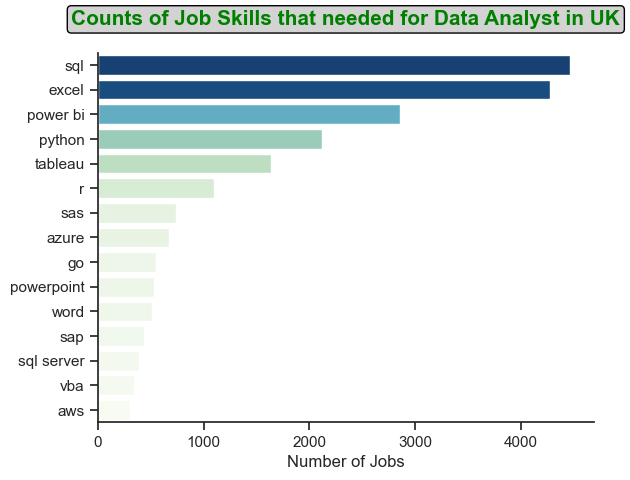

In [4]:
df_UK_DA = df_UK[df_UK['job_title_short'] == 'Data Analyst'].copy()

df_UK_skill = df_UK_DA.explode('job_skills')

df_plot_UK_skill = df_UK_skill['job_skills'].value_counts().to_frame().head(15)

sns.barplot(data=df_plot_UK_skill, x='count', y='job_skills',hue='count', palette='GnBu',legend=False)
sns.despine()
plt.title('Counts of Job Skills that needed for Data Analyst in UK', color='green', fontsize=15, fontweight='bold', pad=20,
          bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgray', edgecolor='black'))
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

## Insights:
### 1. Top 3 Most Required Skills (Must Have):
- SQL is the most in-demand skill — mentioned in over 4,500 job postings.

- Excel comes a close second — still vital for day-to-day data manipulation.

- Power BI ranks third, showing the importance of business intelligence and visualization tools.

(These three are essential baseline skills for Data Analysts in the UK market.)

### 2. Programming & Analytics Tools (Recommended):
- Python ranks 4th, showing that programming for data wrangling, analysis, and automation is increasingly required.  

- Tableau, R, and SAS also appear — all analytics and visualization tools, with Tableau leading the group.

(The market favors low-code tools, but coding skills (especially Python) are gaining prominence.)

### 3. Cloud & Infrastructure:
Azure and AWS are listed but appear far down, indicating that cloud familiarity is a plus, not a must for most roles.

### 4. Other Software/Tools:
- Tools like Go, PowerPoint, Word, VBA, and SQL Server appear with lower frequency.

- These may reflect legacy systems, internal reporting workflows, or cross-functional expectations.

